5.	Собрать установку для измерения данных ЭКГ, передать данные на ПК с помощью pySerial, вычислить основные параметры вариационной пульсометрии. Замеры провести в трех состояниях (перед нагрузкой, после 5 минут бега, после 15 минут бега)

In [76]:
import pandas as pd

In [77]:
df = pd.read_table("ECG1.dat", sep='	', names=["time", "value"], header=None)
df.reset_index(inplace = True)
df.pop("time")
df.head()

,index,value
0,0,2.098039
1,1,2.392157
2,2,3.196079
3,3,3.823529
4,4,4.000000


Text(0.5, 1.0, 'ECG')

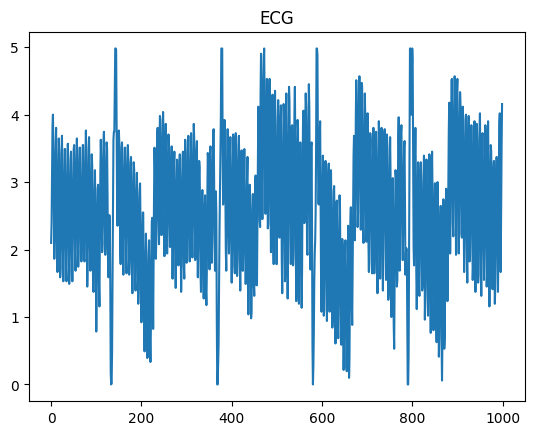

In [78]:
from matplotlib import pyplot as plt
plt.plot(df['value'][:1000])
plt.title('ECG')

In [79]:
nss = df['value']

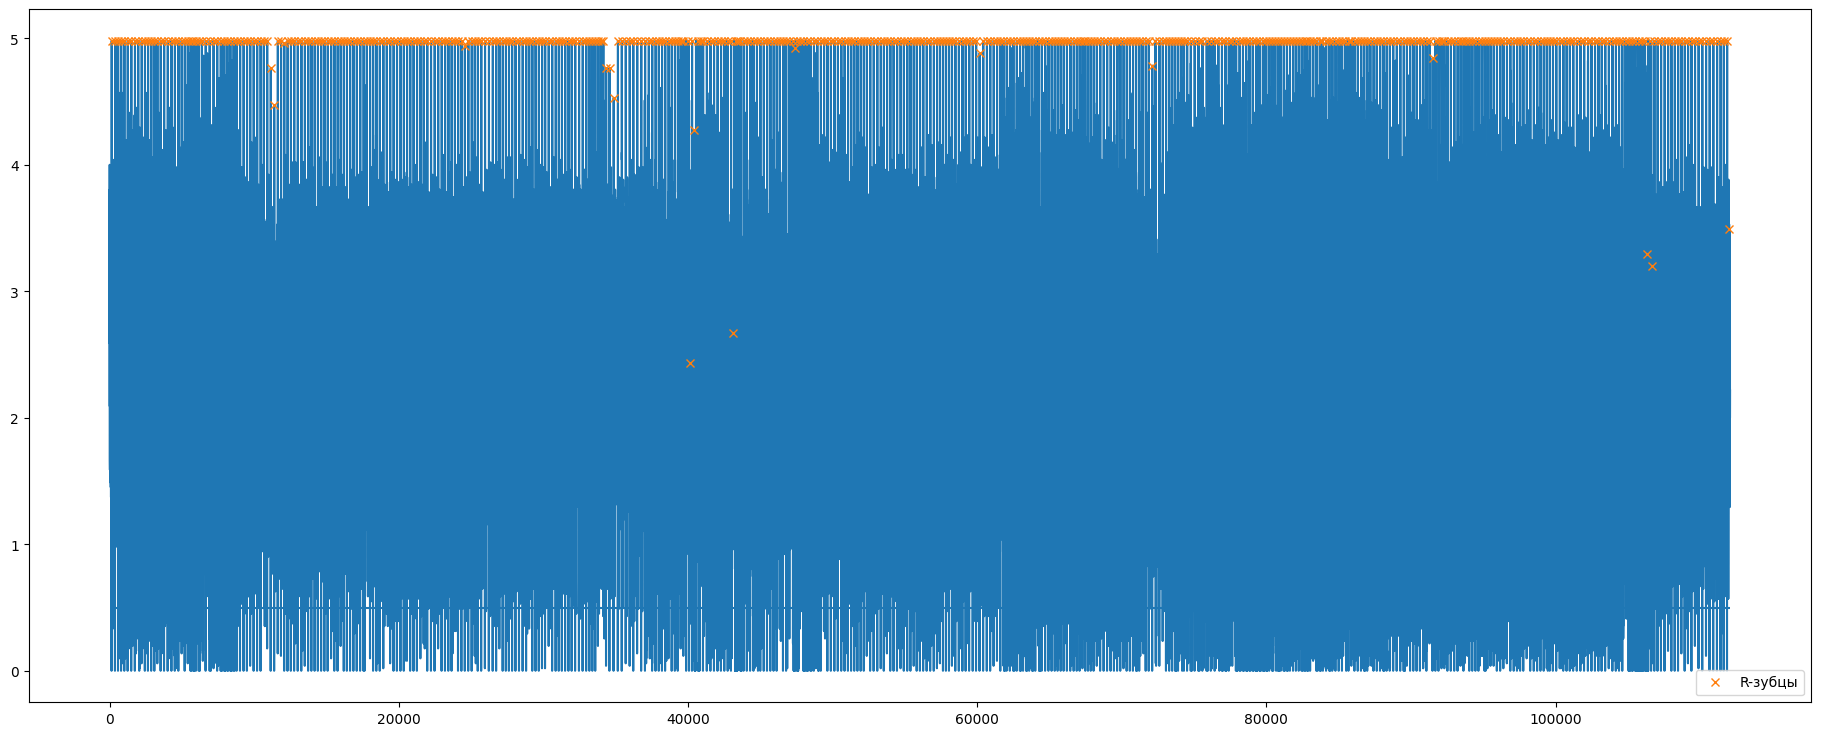

In [80]:
from scipy.signal import find_peaks

rPeaks, _ = find_peaks(df["value"], height = 1.5, distance = 150)
rPeaks = rPeaks.tolist()
plt.figure(figsize=(23, 9))
plt.hlines(0.5, 0, len(df["value"]))
plt.plot(df["value"])
plt.plot(rPeaks, df["value"][rPeaks], "x")
plt.legend(loc='best')
plt.show()

In [81]:
rIntervalsECG = []
for i in range(len(rPeaks) - 1):
    rIntervalsECG.append((rPeaks[i + 1] - rPeaks[i]) / 300 * 1000)
rIntervalsECG.append(pd.Series(rIntervalsECG).mean())

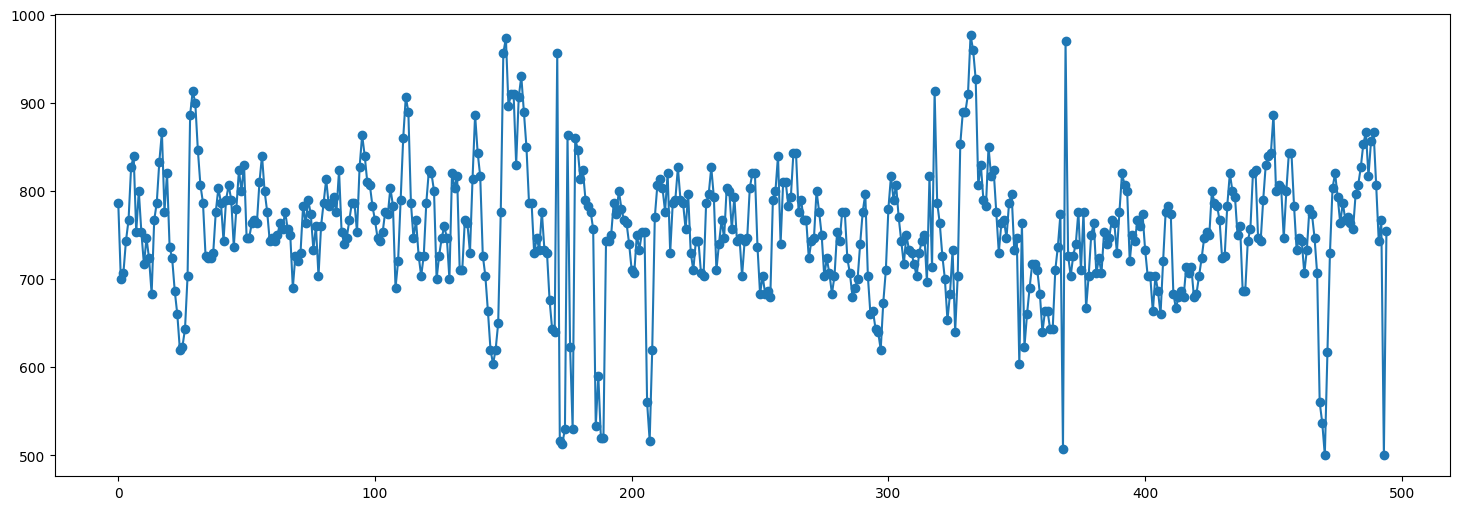

In [82]:
plt.figure(figsize=(18, 6))
plt.plot(rIntervalsECG, marker='o')
plt.show()

In [83]:
seriesIntervalsECG = pd.Series(rIntervalsECG)

MECG = seriesIntervalsECG.mean() / 1000
print("Математическое ожидание        = " + str(MECG) + " с")

SECG = seriesIntervalsECG.std(ddof = 0) / 1000
print("Среднеквадратичное отклонение  = " + str(SECG) + " с")

CVECG = SECG / MECG * 100
print("Коэффициент вариации           = " + str(CVECG))

Математическое ожидание        = 0.7549055330634277 с
Среднеквадратичное отклонение  = 0.07412355130682789 с
Коэффициент вариации           = 9.818917475148508


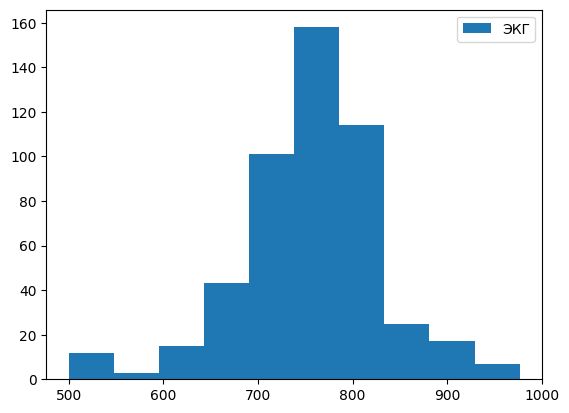

In [84]:
plt.hist(x = rIntervalsECG, label='ЭКГ')
plt.legend(loc='upper right')
plt.show()

In [85]:
df = pd.read_table("ECG2.dat", sep='	', names=["time", "value"], header=None)
df.reset_index(inplace = True)
df.pop("time")
df.head()

,index,value
0,0,2.901961
1,1,3.313725
2,2,2.666667
3,3,2.098039
4,4,1.901961


Text(0.5, 1.0, 'ECG')

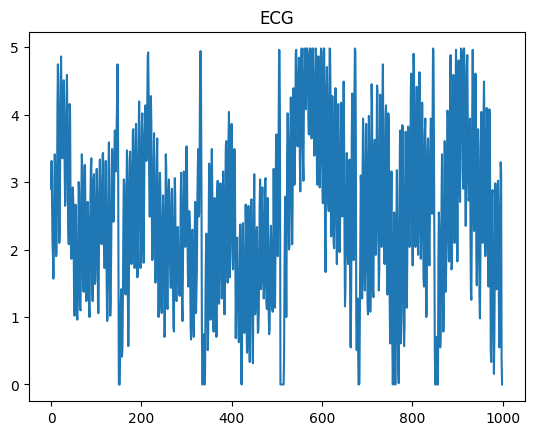

In [86]:
from matplotlib import pyplot as plt
plt.plot(df['value'][:1000])
plt.title('ECG')

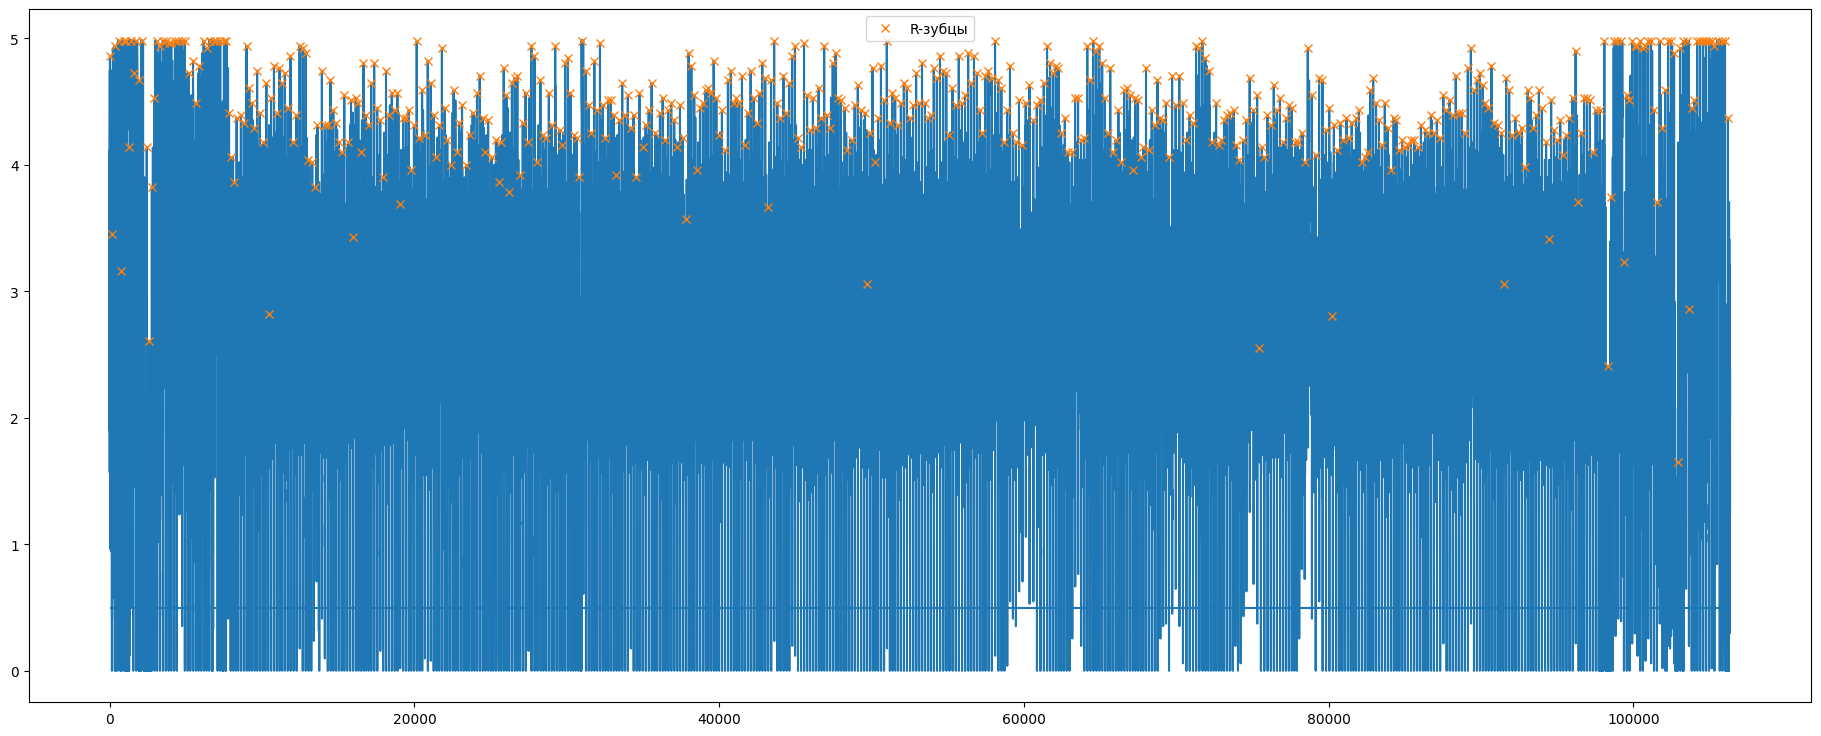

In [87]:
from scipy.signal import find_peaks

rPeaks, _ = find_peaks(df["value"], height = 1.5, distance = 150)
rPeaks = rPeaks.tolist()
plt.figure(figsize=(23, 9))
plt.hlines(0.5, 0, len(df["value"]))
plt.plot(df["value"])
plt.plot(rPeaks, df["value"][rPeaks], "x")
plt.legend(loc='best')
plt.show()

In [88]:
rIntervalsECG2 = []
for i in range(len(rPeaks) - 1):
    rIntervalsECG2.append((rPeaks[i + 1] - rPeaks[i]) / 300 * 1000)
rIntervalsECG2.append(pd.Series(rIntervalsECG2).mean())

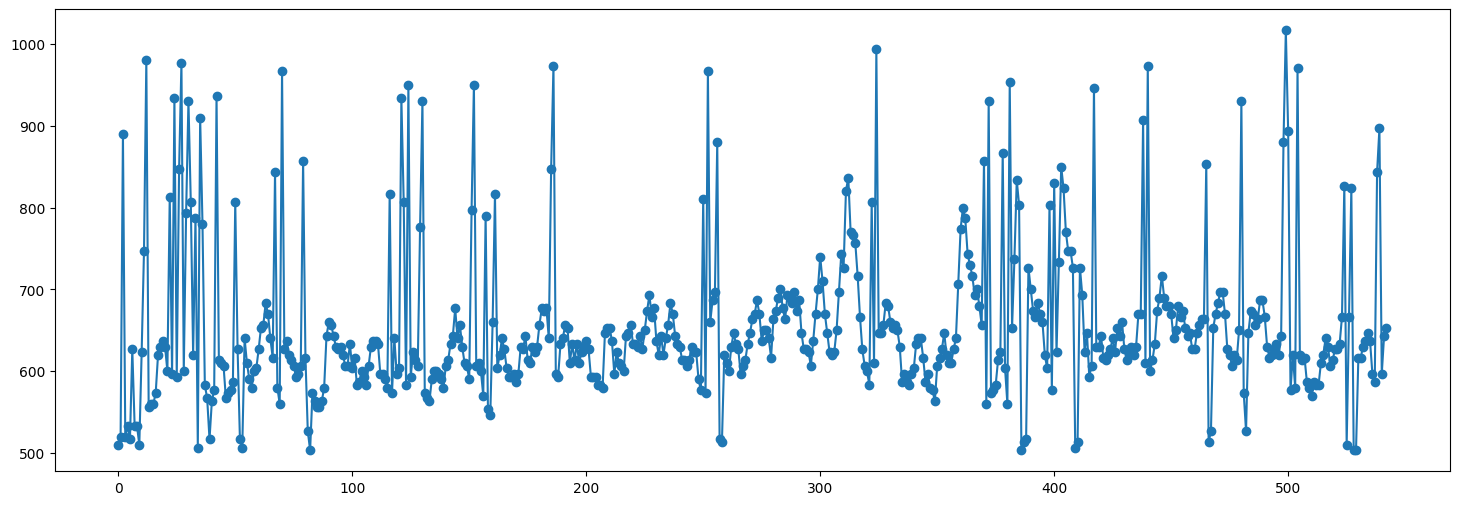

In [89]:
plt.figure(figsize=(18, 6))
plt.plot(rIntervalsECG2, marker='o')
plt.show()

In [90]:
seriesIntervalsECG = pd.Series(rIntervalsECG2)

MECG = seriesIntervalsECG.mean() / 1000
print("Математическое ожидание        = " + str(MECG))

SECG = seriesIntervalsECG.std(ddof = 0) / 1000
print("Среднеквадратичное отклонение  = " + str(SECG))

CVECG = SECG / MECG * 100
print("Коэффициент вариации           = " + str(CVECG))

Математическое ожидание        = 0.6529950799507995 с
Среднеквадратичное отклонение  = 0.09324004576916277 с
Коэффициент вариации           = 14.278828222746794


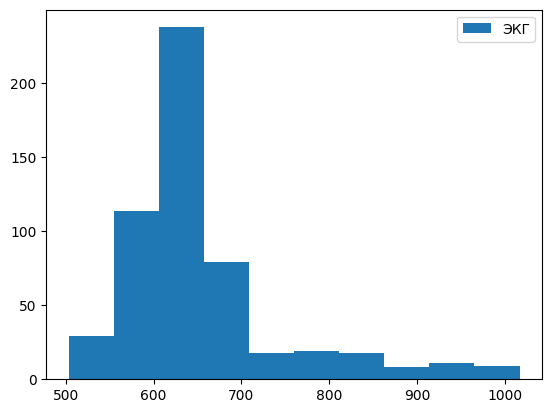

In [91]:
plt.hist(x = rIntervalsECG2, label='ЭКГ')
plt.legend(loc='upper right')
plt.show()

In [483]:
df = pd.read_table("ECG3.dat", sep='	', names=["time", "value"], header=None)
df.reset_index(inplace = True)
df.pop("time")
df.head()

,index,value
0,0,4.411765
1,1,4.980392
2,2,4.980392
3,3,4.980392
4,4,4.980392


Text(0.5, 1.0, 'ECG')

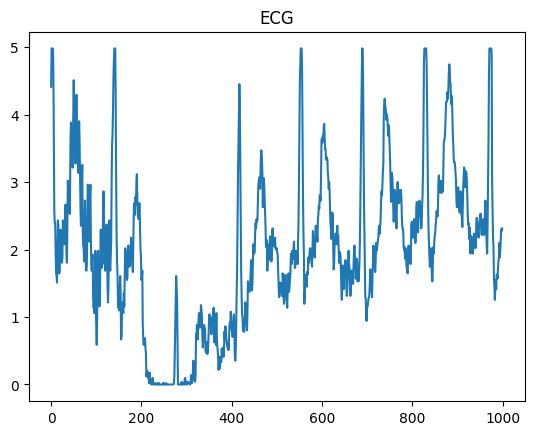

In [485]:
from matplotlib import pyplot as plt
plt.plot(df['value'][:1000])
plt.title('ECG')

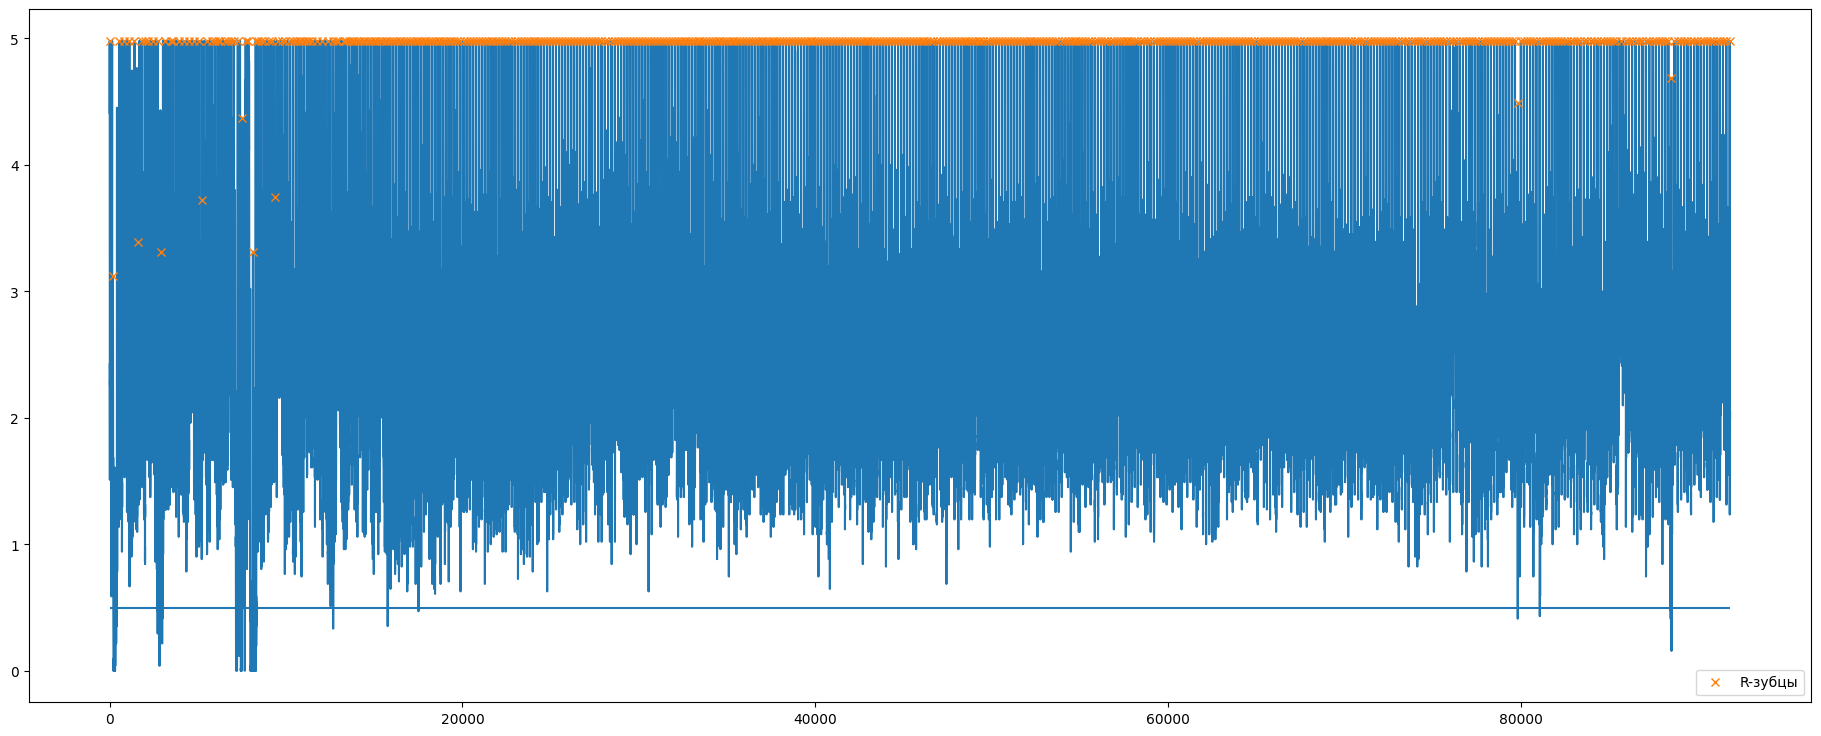

In [486]:
from scipy.signal import find_peaks

rPeaks, _ = find_peaks(df["value"],  height = 2, distance = 150)
rPeaks = rPeaks.tolist()
plt.figure(figsize=(23, 9))
plt.hlines(0.5, 0, len(df["value"]))
plt.plot(df["value"])
plt.plot(rPeaks, df["value"][rPeaks], "x", label='R-зубцы')
plt.legend(loc='best')
plt.show()

In [487]:
rIntervalsECG3 = []
for i in range(len(rPeaks) - 1):
    rIntervalsECG3.append((rPeaks[i + 1] - rPeaks[i]) / 300 * 1000)
rIntervalsECG3.append(pd.Series(rIntervalsECG3).mean())

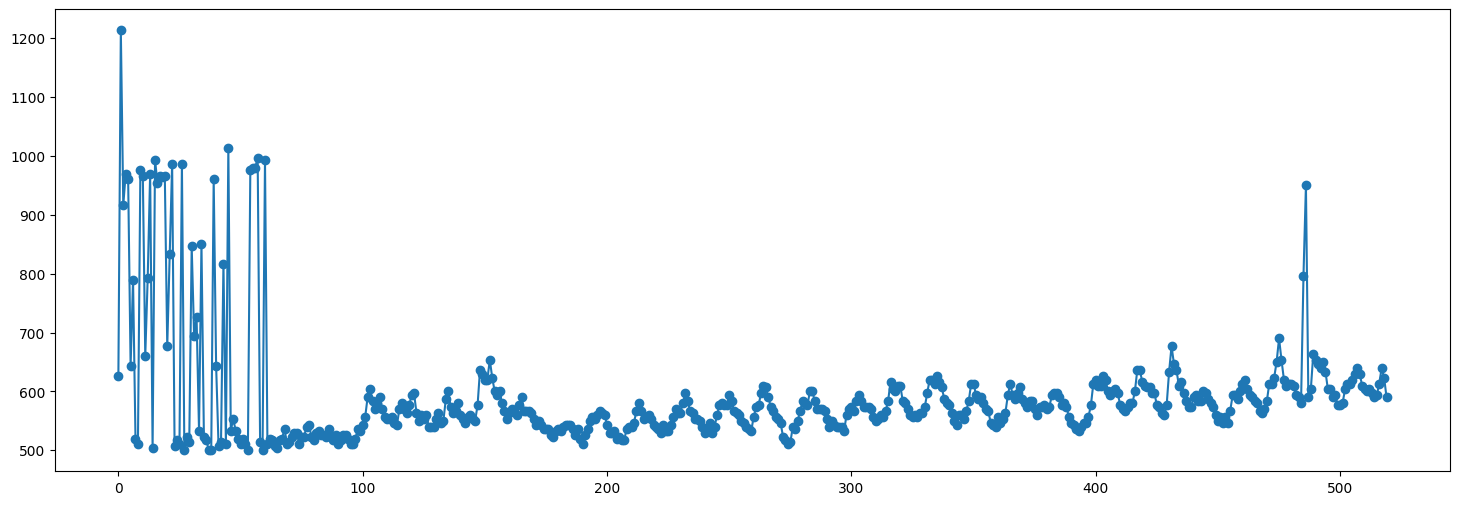

In [490]:
plt.figure(figsize=(18, 6))
plt.plot(rIntervalsECG3, marker='o')
plt.show()

In [491]:
seriesIntervalsECG = pd.Series(rIntervalsECG2)

# Математическое ожидание (RRNN) (Среднее значение)
MECG = seriesIntervalsECG.mean() / 1000
print("Математическое ожидание        = " + str(MECG) + " с")

# Среднеквадратичное отклонение (SDNN) (Средний разброс элементов относительно мат. ожидания)
SECG = seriesIntervalsECG.std(ddof = 0) / 1000
print("Среднеквадратичное отклонение  = " + str(SECG) + " с")

# Коэффициент вариации (CV) (То же среднеквадратичное отклонение, но с нормировкой по пульсу)
CVECG = SECG / MECG * 100
print("Коэффициент вариации           = " + str(CVECG))

Математическое ожидание        = 0.6529950799507995 с
Среднеквадратичное отклонение  = 0.09324004576916277 с
Коэффициент вариации           = 14.278828222746794


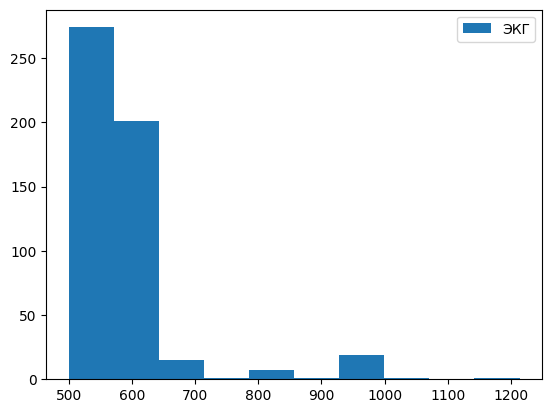

In [492]:
plt.hist(x = rIntervalsECG3, label='ЭКГ')
plt.legend(loc='upper right')
plt.show()

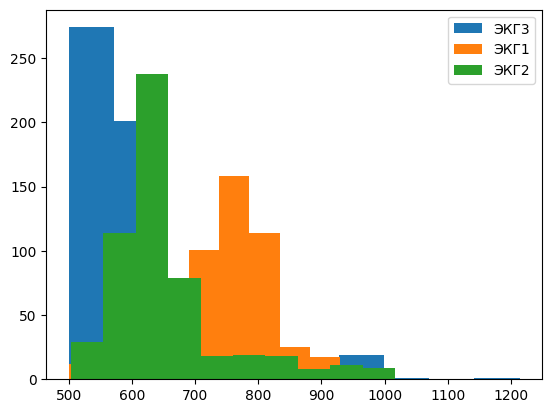

In [495]:
plt.hist(x = rIntervalsECG3, label='ЭКГ3')
plt.hist(x = rIntervalsECG, label='ЭКГ1')
plt.hist(x = rIntervalsECG2, label='ЭКГ2')
plt.legend(loc='upper right')
plt.show()

После упражнения вариабельность сердечного ритма понизилась
После упражнения ЧСС повысилась
Гистограмма вариабильности сердечного ритма становится уже после выполнения упражнений